# Approximation ratios comparison

In [1]:
import networkx as nx
from openqaoa.problems import MaximumCut
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from openqaoa.backends import create_device
from openqaoa import QAOA  
from qiskit import transpile
from openqaoa.utilities import ground_state_hamiltonian

import os
import json

### Functions

In [2]:
def read_files(problems_directories,problem_best_files,bechmarktype_director):    
    # iterate over the problem directories
    results = []
    for problem_index,(problem_dir,problem_bf) in enumerate(zip(problems_directories,problem_best_files)):
        
        # form the complete directory for the current problem
        file_path = 'results_cvar_qaoa/'+problem_dir+'/'+bechmarktype_director+"/"+'prob'+problem_bf+'.json'
    
        # initialize problem substructure

        # create the complete filepath and the shortened filename (that is, just showing QAOA hyperparameters + cvar)
        #file_path = os.path.join(complete_dir, problem_bf+'.json')
        shortened_filename = problem_bf[4:-5]
    
        # open the file
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                # load the file as a dict and get its relevant information
                jsondata = json.load(file) 
                optimal_cost = jsondata['optimized']['cost']
                optimal_number_evals = jsondata['optimized']['eval_number']
                number_evals = jsondata['evals']['number_of_evals']

                # update the cost, cost fev number and nfev sumatories, and the min-max values if neccesary
                results.append({})
                results[problem_index]['file'] = problem_bf
                results[problem_index]['optimal_cost'] = optimal_cost
                results[problem_index]['optimal_number_evals'] = optimal_number_evals
                results[problem_index]['number_evals'] = number_evals
                del jsondata
            except json.JSONDecodeError as e:
                print(f"Error uploading {file_path}: {e}")
    
    return results

### Read files

In [4]:
problems_directories = ['prob0','prob1','prob2','prob3','prob4'] # directorioes for each problem

best_cvar_configuration_names = [
    '0.5_p5-standard-ramp-x-COBYLA',
    '0.5_p4-standard-ramp-x-COBYLA',
    '0.4_p5-standard-ramp-x-COBYLA',
    '0.2_p5-standard-ramp-x-COBYLA',
    '0.3_p5-standard-ramp-x-COBYLA'
]

best_exp_configuration_names = [
    '1.0_p5-standard-ramp-x-COBYLA',
    '1.0_p4-standard-ramp-x-COBYLA',
    '1.0_p4-standard-ramp-x-COBYLA',
    '1.0_p5-standard-ramp-x-COBYLA',
    '1.0_p5-standard-ramp-x-COBYLA'
]

In [5]:
noiselesscvar_confs = [a+'_noiseless' for a in best_cvar_configuration_names]

problems_noiselesscvar = read_files(problems_directories,noiselesscvar_confs,'noiselessCVAR' )
#problems_noiselesscvar

In [6]:
noisycvar_confs = [a+'_noisycvar' for a in best_cvar_configuration_names]

problems_noisycvar = read_files(problems_directories,noisycvar_confs,'noisyCVAR' )
#problems_noisycvar

In [ ]:
mitcvar_confs = [a+'_mitcvar' for a in best_cvar_configuration_names]

problems_mitcvar = read_files(problems_directories,mitcvar_confs,'mitCVAR' )
#problems_mitcvar

In [9]:
noiselessexp_confs = [a+'_noiseless' for a in best_exp_configuration_names]

problems_noiselessexp = read_files(problems_directories,noiselessexp_confs,'noiselessEXP')
#problems_noiselessexp

In [10]:
noisyexp_confs = [a+'_noisyexp' for a in best_exp_configuration_names]

problems_noisyexp = read_files(problems_directories,noisyexp_confs,'noisyEXP')
#problems_noisyexp

In [21]:
mitexp_confs = [a+'_mitexp' for a in best_exp_configuration_names]

problems_mitexp = read_files(problems_directories,mitexp_confs,'mitEXP')
#problems_mitexp

## Create MaxCut Problems

In [11]:
graph1 = nx.Graph()
graph1.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph1.add_edges_from([(0, 6), (0, 8), (1, 5), (2, 7), (2, 8), (3, 5), (3, 7), (4, 8), (6, 7), (7, 9), (8, 9)])

graph2 = nx.Graph()
graph2.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph2.add_edges_from([(0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 8), (1, 4), (1, 6), (1, 8), (1, 9), (2, 4), (2, 6), (3, 4), (3, 6), (3, 8), (3, 9), (4, 5), (4, 7), (4, 9), (5, 8), (6, 7), (7, 8), (7, 9), (8, 9)])

graph3 = nx.Graph()
graph3.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph3.add_edges_from([(0, 1), (0, 2), (0, 4), (0, 9), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (6, 8), (6, 9), (7, 8), (7, 9)])

graph4 = nx.Graph()
graph4.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph4.add_edges_from([(0, 3), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (3, 4), (3, 6), (3, 7), (4, 5), (4, 6), (4, 9), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9)])

graph5 = nx.Graph()
graph5.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
graph5.add_edges_from([(0, 5), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 6), (1, 9), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (3, 5), (3, 6), (3, 7), (3, 9), (4, 6), (4, 7), (4, 9), (5, 6), (6, 7), (6, 8), (7, 9)])

mc1 = MaximumCut(graph1)
mc2 = MaximumCut(graph2)
mc3 = MaximumCut(graph3)
mc4 = MaximumCut(graph4)
mc5 = MaximumCut(graph5)

mcs = [mc1, mc2, mc3, mc4, mc5]

### Find the costs of the optimal solutions

In [12]:
optimal_costs = []
for i,mc in enumerate(mcs):
    
    # get the MaxCut qubo
    mc = mc.qubo
    q = QAOA()    
    q.compile(mc)
    correct_solution = ground_state_hamiltonian(q.cost_hamil)
    print('correct solution for problem',i,':',correct_solution)
    optimal_costs.append(correct_solution[0])

correct solution for problem 0 : (-9.0, ['0000010110', '1000010110', '0000011110', '1111100001', '0111101001', '1111101001'])
correct solution for problem 1 : (-16.0, ['0111010100', '1000101011'])
correct solution for problem 2 : (-12.0, ['1001011100', '0110100011'])
correct solution for problem 3 : (-12.0, ['1110100110', '0001011001'])
correct solution for problem 4 : (-12.0, ['1011101000', '0100110110', '0101110110', '1010001001', '1011001001', '0100010111'])


### Calculate approximation ratios

In [35]:
noiselesscvar_approxratios = []
noiselessexp_approxratios = []
noisyexp_approxratios = []

noisycvar_approxratios = []
mitexp_approxratios = []
mitcvar_approxratios = []

for i,opt_cost in enumerate(optimal_costs):
    problems_noiselesscvar[i]['approximation_ratio'] = round(problems_noiselesscvar[i]['optimal_cost'] / opt_cost,4)
    problems_noiselessexp[i]['approximation_ratio'] = round(problems_noiselessexp[i]['optimal_cost'] / opt_cost,4)
    noiselessexp_approxratios.append(round(problems_noiselessexp[i]['optimal_cost'] / opt_cost,4))
    noiselesscvar_approxratios.append(round(problems_noiselesscvar[i]['optimal_cost'] / opt_cost,4))

    
    problems_noisycvar[i]['approximation_ratio'] = round(problems_noisycvar[i]['optimal_cost'] / opt_cost,4)
    problems_noisyexp[i]['approximation_ratio'] = round(problems_noisyexp[i]['optimal_cost'] / opt_cost,4)
    noisycvar_approxratios.append(round(problems_noisycvar[i]['optimal_cost'] / opt_cost,4))
    noisyexp_approxratios.append(round(problems_noisyexp[i]['optimal_cost'] / opt_cost,4))

    #problems_mitcvar[i]['approximation_ratio'] = round(problems_mitcvar[i]['optimal_cost'] / opt_cost,4)
    #problems_mitexp[i]['approximation_ratio'] = round(problems_mitexp[i]['optimal_cost'] / opt_cost,4)
    #mitcvar_approxratios.append(round(problems_mitcvar[i]['optimal_cost'] / opt_cost,4))
    #mitexp_approxratios.append(round(problems_mitexp[i]['optimal_cost'] / opt_cost,4))

In [27]:
#problems_noiselesscvar

In [32]:
#problems_noiselessexp

### Restructure optimal fevs

In [40]:
noiselessexp_optimalfev = []
noisyexp_optimalfev = []
noiselesscvar_optimalfev = []

noisycvar_optimalfev = []
mitexp_optimalfev = []
mitcvar_optimalfev = []

for i in range(5):
    noiselesscvar_optimalfev.append(problems_noiselesscvar[i]['optimal_number_evals'])
    noiselessexp_optimalfev.append(problems_noiselessexp[i]['optimal_number_evals'])
    noisyexp_optimalfev.append(round(problems_noisyexp[i]['optimal_number_evals']))

    noisycvar_optimalfev.append(problems_noisycvar[i]['optimal_number_evals'])
    #mitexp_optimalfev.append(round(problems_mitexp[i]['optimal_number_evals']))
    #mitcvar_optimalfev.append(round(problems_mitcvar[i]['optimal_number_evals']))

### Calculate qualities

In [29]:
def quality(R,E):
    #return round(R * (1-(E/200)),4)
    return round(R * (1 - (E / 250)), 4) # representar en geogebra
    
#def quality2(R,E,E2):
#    return round(R * (1-(E/200)) * (1-(E2/200)),4)

noiselesscvar_qualities = []
noiselessexp_qualities = []
noisycvar_qualities = []
noisyexp_qualities = []
#mitcvar_qualities = []
#mitexp_qualities = []

#'mitcvar,mitexp
for noiselesscvar,noiselessexp,noisycvar,noisyexp in zip(
    problems_noiselesscvar,
    problems_noiselessexp,
    problems_noisycvar,
    problems_noisyexp,
    #problems_mitcvar,
    #problems_mitexp
    ):
    noiselesscvar_quality = quality(noiselesscvar['approximation_ratio'],noiselesscvar['optimal_number_evals'])
    noiselesscvar_qualities.append(noiselesscvar_quality)
    
    noiselessexp_quality = quality(noiselessexp['approximation_ratio'],noiselessexp['optimal_number_evals'])
    noiselessexp_qualities.append(noiselessexp_quality)

    noisycvar_quality = quality(noisycvar['approximation_ratio'],noisycvar['optimal_number_evals'])
    noisycvar_qualities.append(noisycvar_quality)
    
    noisyexp_quality = quality(noisyexp['approximation_ratio'],noisyexp['optimal_number_evals'])
    noisyexp_qualities.append(noisyexp_quality)

    #mitcvar_quality = quality(mitcvar['approximation_ratio'],mitcvar['optimal_number_evals'])
    #mitcvar_qualities.append(mitcvar_quality)
    
    #mitexp_quality = quality(mitexp['approximation_ratio'],mitexp['optimal_number_evals'])
    #mitexp_qualities.append(mitexp_quality)
    
    print('noiseless_cvar:',noiselesscvar_quality,', noiseless_exp:',noiselessexp_quality)

noiseless_cvar: 0.4996 , noiseless_exp: 0.6162
noiseless_cvar: 0.6069 , noiseless_exp: 0.4845
noiseless_cvar: 0.5161 , noiseless_exp: 0.4622
noiseless_cvar: 0.5175 , noiseless_exp: 0.5098
noiseless_cvar: 0.5543 , noiseless_exp: 0.4788


### Plot qualities

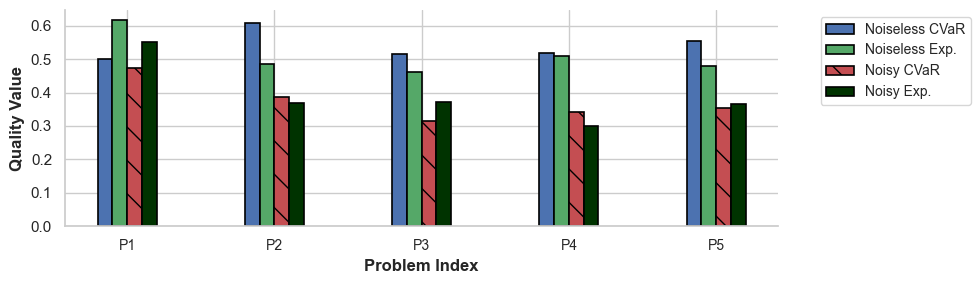

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo con seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Índices para las barras
indices = np.arange(len(noiselesscvar_qualities))
width = 0.1  # Ancho de las barras para dejar espacio entre ellas
width2 = 0.07  # Ancho de las barras para dejar espacio entre ellas

# Crear la figura y los ejes con un tamaño más pequeño
fig, ax = plt.subplots(figsize=(10, 3))

# Graficar las barras con bordes
bars1 = ax.bar(indices - 1.5 * width, noiselesscvar_qualities, width=width, label='Noiseless CVaR',
               color=sns.color_palette("deep")[0], edgecolor='black', linewidth=1.2)
bars2 = ax.bar(indices - 0.5 * width, noiselessexp_qualities, width=width, label='Noiseless Exp.',
               color=sns.color_palette("deep")[2], edgecolor='black', linewidth=1.2)
bars3 = ax.bar(indices + 0.5 * width, noisycvar_qualities, width=width, label='Noisy CVaR',
               color=sns.color_palette("deep")[3], edgecolor='black', linewidth=1.2, hatch='\\')
bars4 = ax.bar(indices + 1.5 * width, noisyexp_qualities, width=width, label='Noisy Exp.',
               color='#003300', edgecolor='black', linewidth=1.2, hatch='')
#bars5 = ax.bar(indices + width2+width2, mitexp_qualities, width=width2, label='ZNE Exp.',
#               color=sns.color_palette("deep")[4], edgecolor='black', linewidth=1.2, hatch='\\')
#bars6 = ax.bar(indices + width2*2+width2, mitcvar_qualities, width=width2, label='ZNE CVaR',
#              color=sns.color_palette("deep")[5], edgecolor='black', linewidth=1.2, hatch='\\') # TODO CVAR + ZNE NOT IMPLEMENTED YEY


# TODO noisy could be taken since they are pretty obvious and only interfere with the analysis.

# Etiquetas y título con fuentes elegantes
ax.set_xlabel('Problem Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Quality Value', fontsize=12, fontweight='bold')

# Etiquetas del eje X más claras
ax.set_xticks(indices)
ax.set_xticklabels([f'P{i+1}' for i in indices], fontsize=10)

# Mover la leyenda fuera del área del gráfico (fuera de la figura)
ax.legend(frameon=True, loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))

# Mejorar apariencia del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('imgs/quality_value.pdf')
plt.show()


### Plot approximation ratios and index of optimal funtion evaluation

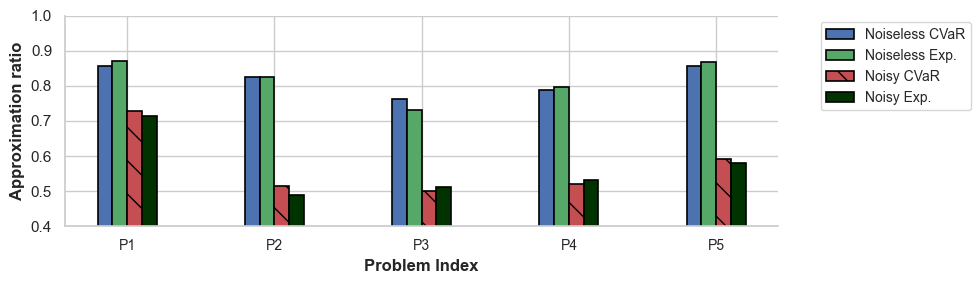

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo con seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Índices para las barras
indices = np.arange(len(noiselesscvar_qualities))
width = 0.1  # Ancho de las barras para dejar espacio entre ellas
width2 = 0.07  # Ancho de las barras para dejar espacio entre ellas

# Crear la figura y los ejes con un tamaño más pequeño
fig, ax = plt.subplots(figsize=(10, 3))

# Graficar las barras con bordes
bars1 = ax.bar(indices - 1.5 * width, noiselesscvar_approxratios, width=width, label='Noiseless CVaR',
               color=sns.color_palette("deep")[0], edgecolor='black', linewidth=1.2)
bars2 = ax.bar(indices - 0.5 * width, noiselessexp_approxratios, width=width, label='Noiseless Exp.',
               color=sns.color_palette("deep")[2], edgecolor='black', linewidth=1.2)
bars3 = ax.bar(indices + 0.5 * width, noisycvar_approxratios, width=width, label='Noisy CVaR',
               color=sns.color_palette("deep")[3], edgecolor='black', linewidth=1.2, hatch='\\')
bars4 = ax.bar(indices + 1.5 * width, noisyexp_approxratios, width=width, label='Noisy Exp.',
               color='#003300', edgecolor='black', linewidth=1.2, hatch='')

#bars5 = ax.bar(indices + width2+width2, mitexp_approxratios, width=width2, label='ZNE Exp.',
#               color=sns.color_palette("deep")[4], edgecolor='black', linewidth=1.2, hatch='\\')
#bars6 = ax.bar(indices + width2*2+width2, mitcvar_approxratios, width=width2, label='ZNE CVaR',
#              color=sns.color_palette("deep")[5], edgecolor='black', linewidth=1.2, hatch='\\') # TODO CVAR + ZNE NOT IMPLEMENTED YEY

ax.set_ylim(0.4,1)

# Etiquetas y título con fuentes elegantes
ax.set_xlabel('Problem Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Approximation ratio', fontsize=12, fontweight='bold')

# Etiquetas del eje X más claras
ax.set_xticks(indices)
ax.set_xticklabels([f'P{i+1}' for i in indices], fontsize=10)

# Mover la leyenda fuera del área del gráfico (fuera de la figura)
ax.legend(frameon=True, loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))

# Mejorar apariencia del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('imgs/approximation_ratio.pdf')
plt.show()


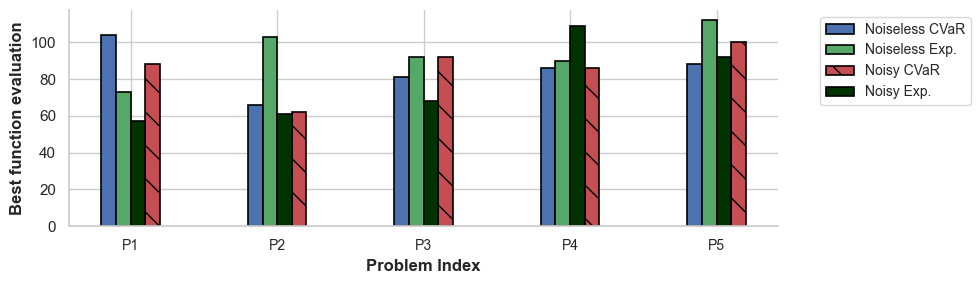

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo con seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Índices para las barras
indices = np.arange(len(noiselesscvar_qualities))
width = 0.1  # Ancho de las barras para dejar espacio entre ellas
width2 = 0.07  # Ancho de las barras para dejar espacio entre ellas

# Crear la figura y los ejes con un tamaño más pequeño
fig, ax = plt.subplots(figsize=(10, 3))

# Graficar las barras con bordes
bars1 = ax.bar(indices - 1.5*width, noiselesscvar_optimalfev, width=width, label='Noiseless CVaR',
               color=sns.color_palette("deep")[0], edgecolor='black', linewidth=1.2)
bars2 = ax.bar(indices - 0.5*width, noiselessexp_optimalfev, width=width, label='Noiseless Exp.',
               color=sns.color_palette("deep")[2], edgecolor='black', linewidth=1.2)
bars3 = ax.bar(indices+1.5*width, noisycvar_optimalfev, width=width, label='Noisy CVaR',
               color=sns.color_palette("deep")[3], edgecolor='black', linewidth=1.2, hatch='\\')
bars4 = ax.bar(indices +0.5 *width, noisyexp_optimalfev, width=width, label='Noisy Exp.',
               color='#003300', edgecolor='black', linewidth=1.2, hatch='')

#bars5 = ax.bar(indices + width2+width2, mitexp_optimalfev, width=width2, label='ZNE Exp.',
#               color=sns.color_palette("deep")[4], edgecolor='black', linewidth=1.2, hatch='\\')
#bars6 = ax.bar(indices + width2*2+width2, mitcvar_approxratios, width=width2, label='ZNE CVaR',
#              color=sns.color_palette("deep")[5], edgecolor='black', linewidth=1.2, hatch='\\') # TODO CVAR + ZNE NOT IMPLEMENTED YEY

#ax.set_ylim(0.4,1)

# Etiquetas y título con fuentes elegantes
ax.set_xlabel('Problem Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Best function evaluation', fontsize=12, fontweight='bold')

# Etiquetas del eje X más claras
ax.set_xticks(indices)
ax.set_xticklabels([f'P{i+1}' for i in indices], fontsize=10)

# Mover la leyenda fuera del área del gráfico (fuera de la figura)
ax.legend(frameon=True, loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))

# Mejorar apariencia del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('imgs/best_function_evaluation.pdf')
plt.show()
